<div style="border:solid black 2px; padding: 20px"><h1 style="color:black; margin-bottom:20px">Reviewer's comment v1</h1>
Halo Dony !

Perkenalkan saya Dipta, disini saya akan mereview tugas Dony ya.

Saya akan memberikan beberapa komen seperti dibawah ini, tolong jangan dipindah, dirubah, maupun dihapus ya.

Komen yang saya berikan akan muncul dalam warna hijau, kuning, atau pun merah seperti ini:

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

<div class="alert alert-warning">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Terdapat beberapa catatan.

</div>

<div class="alert alert-danger">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Perlu beberapa perbaikan

</div>

Dan tentu saja Dony dapat menjawab saya dengan menggunakan ini

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    
Baik kak
</div>

# Faktor Apakah yang Menjual Sebuah Mobil?


Analisis kali ini bertujuan untuk menyelidiki faktor-faktor apa saja yang mempengaruhi harga jual mobil di pasar kendaraan bekas. Untuk itu, kita telah dibekali data puluhan ribu iklan kendaraan yang ditayangkan secara gratis di web  Crankshaft List dalam beberapa tahun terakhir. 

Kita akan terlebih dahulu melakukan pra-pemrosesan atas data yang ada, membersihkan, memperbaiki, dan melengkapinya agar menjadi lebih bersih dan dapat memberikan insight yang jernih. Berangkat dari situ, kita akan menentukan langkah yang akan diambil.


<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, sudah dijelaskan deskripsi project.

</div>

## Pra-pemrosesan

Kita akan menggunakan beberapa library Phyton untuk analisis ini. Kita mulai dengan mengimpor beberapa library penting.

In [138]:
# Muat semua library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")


### Memuat Data

Sekarang kita akan membaca data yang tersedia untuk kita dan memahami kolom-kolomnya.

In [139]:
# Muat file data menjadi DataFrame
path = '/datasets/vehicles_us.csv'
df = pd.read_csv(path)
df.columns

Index(['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'type', 'paint_color', 'is_4wd',
       'date_posted', 'days_listed'],
      dtype='object')

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### Mengeksplorasi Data Awal

*Dataset* yang kami dapatkan berisi kolom-kolom berikut: 


- `price` — harga jual kendaraan
- `model_year` — tahun pembuatan kendaraan
- `model` — jenis kendaraan
- `condition` — kondisi kendaraan
- `cylinders` — jenis atau jumlah silinder kendaraan
- `fuel` — gas, disel, dan lain-lain.
- `odometer` — jarak tempuh kendaraan saat iklan ditayangkan  
- `transmission` — jenis transmisi kendaraan
- `paint_color` — warna kendaraan
- `is_4wd` — apakah kendaraan memiliki penggerak 4 roda (tipe Boolean)
- `date_posted` — tanggal iklan ditayangkan 
- `days_listed` — jumlah hari iklan ditayangkan hingga dihapus 

Mari periksa beberapa informasi umum dari data ini. 

In [140]:
# Informasi/rangkuman umum tentang DataFrame
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [141]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [142]:
# tampilkan sampel data
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [143]:
# memeriksa nilai unik pada beberapa kolom yang berisi nilai berulang
print('Nilai unik kolom is_4w adalah:', df.is_4wd.unique())
print('Nilai unik kolom transmission adalah:', df.transmission.unique())
print('Nilai unik kolom condition adalah:', df.condition.unique())
print('Nilai unik kolom cylinders adalah:', sorted(df.cylinders.unique()))
print('Nilai unik kolom model adalah:', sorted(df.model.unique()))

Nilai unik kolom is_4w adalah: [ 1. nan]
Nilai unik kolom transmission adalah: ['automatic' 'manual' 'other']
Nilai unik kolom condition adalah: ['good' 'like new' 'fair' 'excellent' 'salvage' 'new']
Nilai unik kolom cylinders adalah: [3.0, 4.0, 5.0, 6.0, 8.0, nan, 10.0, 12.0]
Nilai unik kolom model adalah: ['acura tl', 'bmw x5', 'buick enclave', 'cadillac escalade', 'chevrolet camaro', 'chevrolet camaro lt coupe 2d', 'chevrolet colorado', 'chevrolet corvette', 'chevrolet cruze', 'chevrolet equinox', 'chevrolet impala', 'chevrolet malibu', 'chevrolet silverado', 'chevrolet silverado 1500', 'chevrolet silverado 1500 crew', 'chevrolet silverado 2500hd', 'chevrolet silverado 3500hd', 'chevrolet suburban', 'chevrolet tahoe', 'chevrolet trailblazer', 'chevrolet traverse', 'chrysler 200', 'chrysler 300', 'chrysler town & country', 'dodge charger', 'dodge dakota', 'dodge grand caravan', 'ford econoline', 'ford edge', 'ford escape', 'ford expedition', 'ford explorer', 'ford f-150', 'ford f-250

Temuan:
- Total baris data mencapai 51525. Dari 12 kolom yang ada, terdapat 5 kolom yang memiliki nilai NaN (non-null kurang dari 51525).
- Kolom 'model_year', 'cylinders', dan 'odometer' bertipe float (pecahan), mestinya int (bulat). Ketiga kolom ini akan diubah tipe datanya.
- Kolom 'date_posted' memuat data tanggal, tetapi memiliki tipe data string. Kolom ini akan diubah tipenya menjadi datetime.
- Kolom 'is_4wd' seharusnya bertipe boolean, angka 1 berarti beroda 4, sedangkan 0 berarti tidak. Sepertinya, angka 0 direpresentasikan oleh nilai NaN, sehingga kolom ini menjadi kolom dengan nilai non-null paling sedikit. Akan kita benahi.
- Nilai rata-rata (mean) dan median (50%) di kolom 'price' dan 'days_listed' terpaut cukup jauh, kemungkinan karena ada data outsider.
- Nilai terendah di kolom 'odometer' dan 'days_listed' adalah 0. 'Odometer' 0 bisa jadi karena kendaraan masih baru, sedangkan 'days_listed' 0 agak aneh.
- Kita memiliki sejumlah nilai unik pada beberapa kolom. Ini bisa digunakan untuk mengategorikan data.

### Kesimpulan dan Langkah-Langkah Selanjutnya


Secara umum, data yang ada terlihat cukup memadai, tetapi kita perlu membersihkannya terlebih dahulu. Oleh karena itu, di langkah selanjutnya, kita akan melakukan pembersihan data, antara lain mengatasi nilai yang hilang dan mengubah tipe data berdasarkan informasi yang sudah kita identifikasikan di atas.

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## Mengatasi Nilai-Nilai yang Hilang (Jika Ada)

Pada bagian ini, kita akan lebih dalam memeriksa nilai yang hilang pada tiap kolom.

In [144]:
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

Masing-masing kolom dengan nilai yang hilang memiliki karakteristik yang berbeda-beda. Kita tidak dapat menggunakan metode yang sama untuk mengatasi nilai yang hilang pada semua kolom. 

Kita akan mulai dari yang mudah, yakni pada kolom 'is_4wd' dan 'paint_color'. 

Kita akan mengisi nilai yang hilang di kolom 'is_4wd' dengan 0, lalu  mengubah tipe datanya menjadi boolean. Sebab, kolom ini pada dasarnya hanya berisi nilai ya atau tidak. 

Sementara itu, kolom 'paint_color' relatif tidak begitu berhubungan dengan kepentingan analisis kita kali ini. Jadi, nilai yang hilang bisa kita isi dengan 'unknown' tanpa mempengaruhi keseluruhan data.

In [145]:
df['is_4wd'] = df['is_4wd'].where(df['is_4wd'] == 1, 0).astype('bool')
df['paint_color'] = df['paint_color'].fillna('unknown')

In [146]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  bool   
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: bool(1), float64(3), int64(2), object(7)
memory usage: 4.8+ MB


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,unknown,False,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28


Nilai di kolom 'paint_color' sudah terisi, sedangkan di kolom 'is_4wd' juga sudah terisi dan tipe datanya berubah. Selanjutnya, kita akan mengatasi nilai yang hilang di tiga kolom lainnya.

Ketiga kolom lain dengan nilai yang hilang adalah kolom 'model_year', 'cylinders', dan 'odometer'. Ketiga kolom ini  berguna untuk analisis kita, sehingga kita tidak dapat menghapus kolom ini. Namun, jika kita mengisi nilai yang hilang pada ketiga kolom ini, misalnya dengan median, hasilnya dapat mempengaruhi kejernihan analisis kita.

Selain itu, ketiga kolom ini juga berhubungan dengan kolom lainnya. Misalnya, nilai di 'odometer' akan berhubungan dengan kapan kendaraan itu mulai dipasarkan/digunakan ('model_year', yang mana juga ada nilai hilang di dalamnya) dan kondisinya ('condition'). Kolom 'cylinders' juga sangat bergantung pada kolom 'model' (yang mana nilai uniknya sangat banyak). Kita bisa saja mengisinya dengan nilai median, tetapi akan menyebabkan pembengkakan data di level median.

Jika mengisi nilai yang hilang pada ketiga kolom ini, kita dapat memperoleh data yang keliru. Oleh karena itu, kita akan menghapus saja semua baris yang berisi nilai hilang pada ketiga kolom ini. 

In [147]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [148]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36419 entries, 0 to 36418
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         36419 non-null  int64  
 1   model_year    36419 non-null  float64
 2   model         36419 non-null  object 
 3   condition     36419 non-null  object 
 4   cylinders     36419 non-null  float64
 5   fuel          36419 non-null  object 
 6   odometer      36419 non-null  float64
 7   transmission  36419 non-null  object 
 8   type          36419 non-null  object 
 9   paint_color   36419 non-null  object 
 10  is_4wd        36419 non-null  bool   
 11  date_posted   36419 non-null  object 
 12  days_listed   36419 non-null  int64  
dtypes: bool(1), float64(3), int64(2), object(7)
memory usage: 3.4+ MB


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19
1,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79
2,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28
3,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,True,2018-06-20,15
4,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,False,2018-12-27,73


Kita kehilangan hampir 30 persen data. Namun, data dengan jumlah baris 36419 ini masih tergolong banyak dan cukup representatif untuk kepentingan analisis kita kali ini.

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## Memperbaiki Tipe Data

Kita sudah memiliki data yang lengkap sekarang. Kini, kita akan mengubah tipe data agar sesuai.

Berdasarkan informasi sebelumnya, kolom dengan tipe data yang tidak sesuai antara lain yakni 'model_year', 'cylinders', 'odometer', dan 'date_posted'.

In [149]:
df['model_year'] = df['model_year'].astype('int')
df['cylinders'] = df['cylinders'].astype('int')
df['odometer'] = df['odometer'].astype('int')
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%d')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36419 entries, 0 to 36418
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         36419 non-null  int64         
 1   model_year    36419 non-null  int64         
 2   model         36419 non-null  object        
 3   condition     36419 non-null  object        
 4   cylinders     36419 non-null  int64         
 5   fuel          36419 non-null  object        
 6   odometer      36419 non-null  int64         
 7   transmission  36419 non-null  object        
 8   type          36419 non-null  object        
 9   paint_color   36419 non-null  object        
 10  is_4wd        36419 non-null  bool          
 11  date_posted   36419 non-null  datetime64[ns]
 12  days_listed   36419 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(5), object(6)
memory usage: 3.4+ MB


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19
1,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79
2,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28
3,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,True,2018-06-20,15
4,12990,2015,toyota camry,excellent,4,gas,79212,automatic,sedan,white,False,2018-12-27,73


<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## Memperbaiki Kualitas Data

Sekarang, kita akan memperbaiki kualitas data dengan menambahkan sejumlah kolom baru yang berguna untuk mempermudah proses analisis selanjutnya

In [150]:
# Tambahkan nilai waktu dan tanggal pada saat iklan ditayangkan
df['day_posted'] = df['date_posted'].dt.day_name()
df['month_posted'] = df['date_posted'].dt.month_name()
df['year_posted'] = df['date_posted'].dt.year
df.head()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,Saturday,June,2018
1,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,Thursday,February,2019
2,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,Tuesday,April,2019
3,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,Wednesday,June,2018
4,12990,2015,toyota camry,excellent,4,gas,79212,automatic,sedan,white,False,2018-12-27,73,Thursday,December,2018


In [151]:
# Tambahkan usia kendaraan saat iklan ditayangkan
df['age_year'] = df['year_posted'] - df['model_year']
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,age_year
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,Saturday,June,2018,7
1,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,Thursday,February,2019,6
2,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,Tuesday,April,2019,2
3,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,Wednesday,June,2018,4
4,12990,2015,toyota camry,excellent,4,gas,79212,automatic,sedan,white,False,2018-12-27,73,Thursday,December,2018,3


In [152]:
# Tambahkan jarak tempuh rata-rata kendaraan per tahun 
df['mileage_per_year'] = df['odometer'] / df['age_year']
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,age_year,mileage_per_year
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,Saturday,June,2018,7,20714.285714
1,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,Thursday,February,2019,6,18333.333333
2,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,Tuesday,April,2019,2,40451.500000
3,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,Wednesday,June,2018,4,14488.500000
4,12990,2015,toyota camry,excellent,4,gas,79212,automatic,sedan,white,False,2018-12-27,73,Thursday,December,2018,3,26404.000000


In [153]:
df['mileage_per_year'].describe()

count    3.641800e+04
mean              inf
std               NaN
min      0.000000e+00
25%      1.079364e+04
50%      1.540000e+04
75%      2.275000e+04
max               inf
Name: mileage_per_year, dtype: float64

Kita menemukan nilai nan dan inf. Kedua hal ini kemungkinan berhubungan. Kita akan lebih dahulu memeriksa nilai inf.

Nilai inf atau infinite biasanya diperoleh karena faktor pembagi, dalam hal ini kolom 'age_year', memiliki nilai 0. Sebelumnya, kolom 'age_year' kita dapatkan dari pengurangan pada kolom 'year_posted' terhadap 'model_year'. Nilai nol di kolom 'age_year' terjadi karena kedua kolom tersebut bernilai sama.

Kita akan ubah nilai 0 di kolom 'age_year' dengan 1. Kita anggap mobil yang diiklankan di tahun yang sama dengan tahun produksinya memiliki usia 1 tahun.

In [154]:
df['age_year'] = df['age_year'].where(df['age_year'] != 0, 1)

In [155]:
df['age_year'].unique()

array([  7,   6,   2,   4,   3,   1,  10,   8,  11,  15,  17,  12,  14,
         5,  24,  18,   9,  26,  19,  13,  22,  16,  38,  20,  44,  21,
        23,  25,  33,  42,  31,  28,  46,  52,  49,  30,  40,  54,  39,
        50,  27,  32,  29,  55,  37,  56,  34,  53,  45,  51,  63,  47,
        48,  41,  36,  35,  57,  71,  59, 110,  82,  60,  58])

Sudah tidak ada nilai 0. Kita akan perbaiki kolom 'mileage_per_year'.

In [156]:
df['mileage_per_year'] = df['odometer'] / df['age_year']

In [157]:
df['mileage_per_year'].describe()

count     36419.000000
mean      17998.582847
std       13368.085264
min           0.000000
25%       10582.292208
50%       15041.500000
75%       21607.125000
max      373200.000000
Name: mileage_per_year, dtype: float64

Nilai infinite sekarang sudah hilang. 

In [158]:
df['mileage_per_year'].isna().sum()

0

Nilai nan juga hilang. Jadi, kolom ini sudah bisa digunakan. 

Kita berlanjut untuk membuat kolom lainnya.

<div class="alert alert-danger">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

- dapat dilihat ada nilai yang aneh yaitu inf, hal ini terjadi karena di kolom age_year ada nilai = 0
    - minta tolong untuk dicek kembali ya

</div>

<div class="alert alert-success">
<b>Adipta's comment v.2</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

In [159]:
# Mungkin membantu untuk mengganti nilai pada kolom 'condition' dengan sesuatu yang dapat dimanipulasi dengan lebih mudah 
df['condition_rank'] = df['condition'].replace(['new', 'like new', 'excellent', 'good', 'fair', 'salvage'], [5, 4, 3, 2, 1, 0])
df.insert(4, 'condition_rank', df.pop('condition_rank'))
df.head()


,price,model_year,model,condition,condition_rank,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,age_year,mileage_per_year
0,9400,2011,bmw x5,good,2,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,Saturday,June,2018,7,20714.285714
1,5500,2013,hyundai sonata,like new,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,Thursday,February,2019,6,18333.333333
2,14900,2017,chrysler 200,excellent,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,Tuesday,April,2019,2,40451.500000
3,14990,2014,chrysler 300,excellent,3,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,Wednesday,June,2018,4,14488.500000
4,12990,2015,toyota camry,excellent,3,4,gas,79212,automatic,sedan,white,False,2018-12-27,73,Thursday,December,2018,3,26404.000000


In [160]:
# Dictionary untuk condition
condition_dict = df[['condition_rank','condition']].drop_duplicates().sort_values('condition_rank').reset_index(drop=True)
condition_dict

,condition_rank,condition
0,0,salvage
1,1,fair
2,2,good
3,3,excellent
4,4,like new
5,5,new


<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## Memeriksa Data yang Sudah Bersih

Sejauh ini kita sudah melakukan pembersihan dan peningkatan kualitas data. Kita akan memeriksa data sekali lagi sebelum beralih ke proses analisis.

In [161]:
# tampilkan informasi/rangkuman umum tentang DataFrame
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36419 entries, 0 to 36418
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             36419 non-null  int64         
 1   model_year        36419 non-null  int64         
 2   model             36419 non-null  object        
 3   condition         36419 non-null  object        
 4   condition_rank    36419 non-null  int64         
 5   cylinders         36419 non-null  int64         
 6   fuel              36419 non-null  object        
 7   odometer          36419 non-null  int64         
 8   transmission      36419 non-null  object        
 9   type              36419 non-null  object        
 10  paint_color       36419 non-null  object        
 11  is_4wd            36419 non-null  bool          
 12  date_posted       36419 non-null  datetime64[ns]
 13  days_listed       36419 non-null  int64         
 14  day_posted        3641

,price,model_year,condition_rank,cylinders,odometer,days_listed,year_posted,age_year,mileage_per_year
count,36419.000000,36419.000000,36419.000000,36419.000000,36419.000000,36419.000000,36419.000000,36419.000000,36419.000000
mean,12187.675417,2009.753425,2.637003,6.132596,115323.632747,39.649798,2018.306324,8.598424,17998.582847
std,10076.739680,6.265305,0.713758,1.659646,65068.650067,28.119391,0.460972,6.218145,13368.085264
min,1.000000,1908.000000,0.000000,3.000000,0.000000,0.000000,2018.000000,1.000000,0.000000
25%,5000.000000,2006.000000,2.000000,4.000000,69854.000000,19.000000,2018.000000,4.000000,10582.292208
50%,9000.000000,2011.000000,3.000000,6.000000,113000.000000,33.000000,2018.000000,7.000000,15041.500000
75%,16900.000000,2014.000000,3.000000,8.000000,155000.000000,53.000000,2019.000000,12.000000,21607.125000
max,375000.000000,2019.000000,5.000000,12.000000,990000.000000,271.000000,2019.000000,110.000000,373200.000000


Semua data tampaknya sudah bersih. Kita dapat melanjutkan analisis kita.

<div class="alert alert-danger">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

- jangan langsung dihapus ya, nilai 0 ini bisa diganti dengan 1 karena ketika dibagi dengan 1 tidak akan mengubah nilai dari avg odometernya

</div>

<div class="alert alert-success">
<b>Adipta's comment v.2</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

In [162]:
# tampilkan sampel data 
df.head(10)

,price,model_year,model,condition,condition_rank,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,age_year,mileage_per_year
0,9400,2011,bmw x5,good,2,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,Saturday,June,2018,7,20714.285714
1,5500,2013,hyundai sonata,like new,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,Thursday,February,2019,6,18333.333333
2,14900,2017,chrysler 200,excellent,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,Tuesday,April,2019,2,40451.500000
3,14990,2014,chrysler 300,excellent,3,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,Wednesday,June,2018,4,14488.500000
4,12990,2015,toyota camry,excellent,3,4,gas,79212,automatic,sedan,white,False,2018-12-27,73,Thursday,December,2018,3,26404.000000
5,15990,2013,honda pilot,excellent,3,6,gas,109473,automatic,SUV,black,True,2019-01-07,68,Monday,January,2019,6,18245.500000
6,11500,2012,kia sorento,excellent,3,4,gas,104174,automatic,SUV,unknown,True,2018-07-16,19,Monday,July,2018,6,17362.333333
7,19500,2011,chevrolet silverado 1500,excellent,3,8,gas,128413,automatic,pickup,black,True,2018-09-17,38,Monday,September,2018,7,18344.714286
8,8990,2012,honda accord,excellent,3,4,gas,111142,automatic,sedan,grey,False,2019-03-28,29,Thursday,March,2019,7,15877.428571
9,18990,2012,ram 1500,excellent,3,8,gas,140742,automatic,pickup,unknown,True,2019-04-02,37,Tuesday,April,2019,7,20106.000000


## Mempelajari Parameter Inti 

Sekarang kita memasuki proses analisis data eksploratif terhadap data yang kita miliki. Kita akan menyelidiki sejumlah parameter inti yang akan digunakan untuk analisis lebih lanjut, guna mengetahui karakteristik atau sebaran datanya dan menentukan langkah selanjutnya. 

Berikut ini parameter yang akan kita selidiki:
- Harga ('price')
- Usia kendaraan ketika iklan ditayangkan ('age_year')
- Jarak tempuh ('odometer')
- Jumlah silinder ('cylinders')
- Kondisi ('condition_rank')

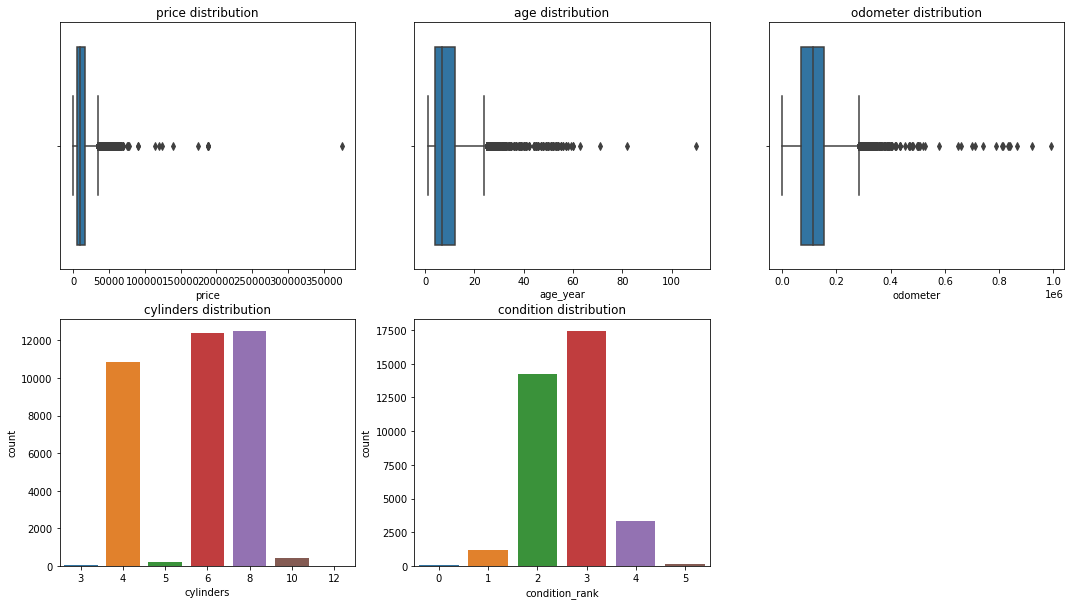

In [163]:
plt.figure(figsize=(18, 10))

plt.subplot(2, 3, 1)
plt.title('price distribution')
sns.boxplot(df['price'])

plt.subplot(2, 3, 2)
plt.title('age distribution')
sns.boxplot(df['age_year'])

plt.subplot(2, 3, 3)
plt.title('odometer distribution')
sns.boxplot(df['odometer'])

plt.subplot(2, 3, 4)
plt.title('cylinders distribution')
sns.countplot(df['cylinders'])

plt.subplot(2, 3, 5)
plt.title('condition distribution')
sns.countplot(df['condition_rank'])

plt.show()



In [164]:
# Dictionary untuk kondisi kendaraan
condition_dict

,condition_rank,condition
0,0,salvage
1,1,fair
2,2,good
3,3,excellent
4,4,like new
5,5,new


Temuan:
- Terdapat outlier yang cukup banyak pada kolom 'price', 'age_year' dan 'odometer'. Kita akan membersihkan outlier ini.
- Jenis silinder kendaraan secara umum terkonsentrasi di jenis 4, 6, dan 8 silinder. Hal ini tidak mengherankan, sebab mayoritas kendaraan yang diproduksi memiliki jumlah silinder 4, 6, atau 8. Meski begitu, masih ada sejumlah kendaraan dengan jumlah silinder yang berbeda di data kita.
- Mayoritas kendaraan berada pada kualitas yang sedang (good & excellent)

Tindakan:

Kita akan menghapus semua outlier. Risikonya yakni jumlah data akan berkurang signifikan. Namun, kita akan memiliki data yang lebih bersih sehingga dapat dianalisis dengan lebih jernih. 



<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## Mempelajari dan Menangani Outlier

Secara umum, data outlier pada ketiga kolom yang kita identifikasikan di atas berada di atas upper whiskers dan tidak ada yang berada di bawah lower whiskers. Jadi, kita hanya akan membuang data yang berada di atas upper whiskers. 

Selain itu, di informasi umum data juga telah ditemukan bahwa tidak ada nilai minus. Jadi, lower whisker atau batas bawah outlier kita tetapkan dengan 0.

Kita akan membuat dataframe yang baru yang berisi data-data tanpa outlier.

In [165]:
# Tentukan batas bawah outlier 
lower_whisker = 0

In [166]:
# Tentukan batas atas outlier 
def upper_whisker (data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    value = Q3 + (1.5 * IQR)
    return value
    

In [167]:
print('Batas atas outlier kolom "price" adalah:', upper_whisker(df, 'price'))
print('Batas atas outlier kolom "age_year" adalah:', upper_whisker(df, 'age_year'))
print('Batas atas outlier kolom "odometer" adalah:', upper_whisker(df, 'odometer'))

Batas atas outlier kolom "price" adalah: 34750.0
Batas atas outlier kolom "age_year" adalah: 24.0
Batas atas outlier kolom "odometer" adalah: 282719.0


In [168]:
# Simpan data tanpa outlier dalam DataFrame yang terpisah
df_new = df[(df['price'] < 34750.0) & (df['age_year'] < 24.0) & (df['odometer'] < 282718.625)].reset_index(drop=True)


In [169]:
df_new.shape

(34226, 19)

In [170]:
df.head()

,price,model_year,model,condition,condition_rank,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,age_year,mileage_per_year
0,9400,2011,bmw x5,good,2,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,Saturday,June,2018,7,20714.285714
1,5500,2013,hyundai sonata,like new,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,Thursday,February,2019,6,18333.333333
2,14900,2017,chrysler 200,excellent,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,Tuesday,April,2019,2,40451.500000
3,14990,2014,chrysler 300,excellent,3,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,Wednesday,June,2018,4,14488.500000
4,12990,2015,toyota camry,excellent,3,4,gas,79212,automatic,sedan,white,False,2018-12-27,73,Thursday,December,2018,3,26404.000000


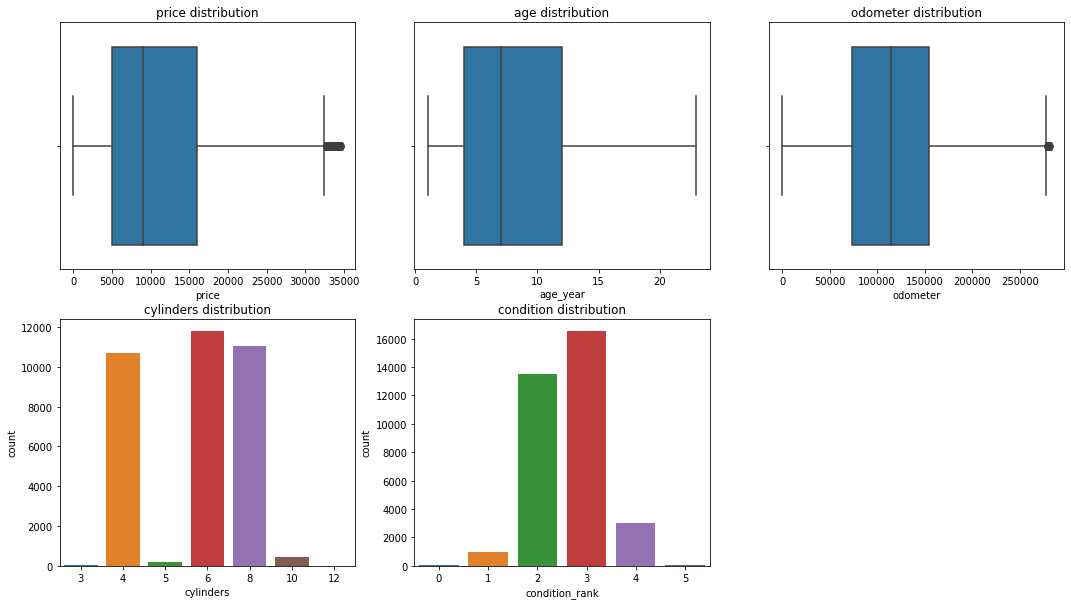

In [171]:
# Grafik untuk dataframe yang baru (df_new)
plt.figure(figsize=(18, 10))

plt.subplot(2, 3, 1)
plt.title('price distribution')
sns.boxplot(df_new['price'])

plt.subplot(2, 3, 2)
plt.title('age distribution')
sns.boxplot(df_new['age_year'])

plt.subplot(2, 3, 3)
plt.title('odometer distribution')
sns.boxplot(df_new['odometer'])

plt.subplot(2, 3, 4)
plt.title('cylinders distribution')
sns.countplot(df_new['cylinders'])

plt.subplot(2, 3, 5)
plt.title('condition distribution')
sns.countplot(df_new['condition_rank'])

plt.show()

Sekarang kita sudah memiliki data baru tanpa outlier pada ketiga kolom yang menjadi parameter inti. Jumlah barisnya berkurang menjadi 34226, masih mencukupi untuk  kebutuhan analisis kita.

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## Mempelajari Parameter Inti Tanpa Outlier

Mari kita bandingkan data kita antara yang masih memiliki outlier (df) dengan yang sudah bersih (df_new). 

Kita tidak mengubah data pada parameter 'cylinders' dan 'condition_rank'. Jadi, kedua data ini akan kita abaikan.

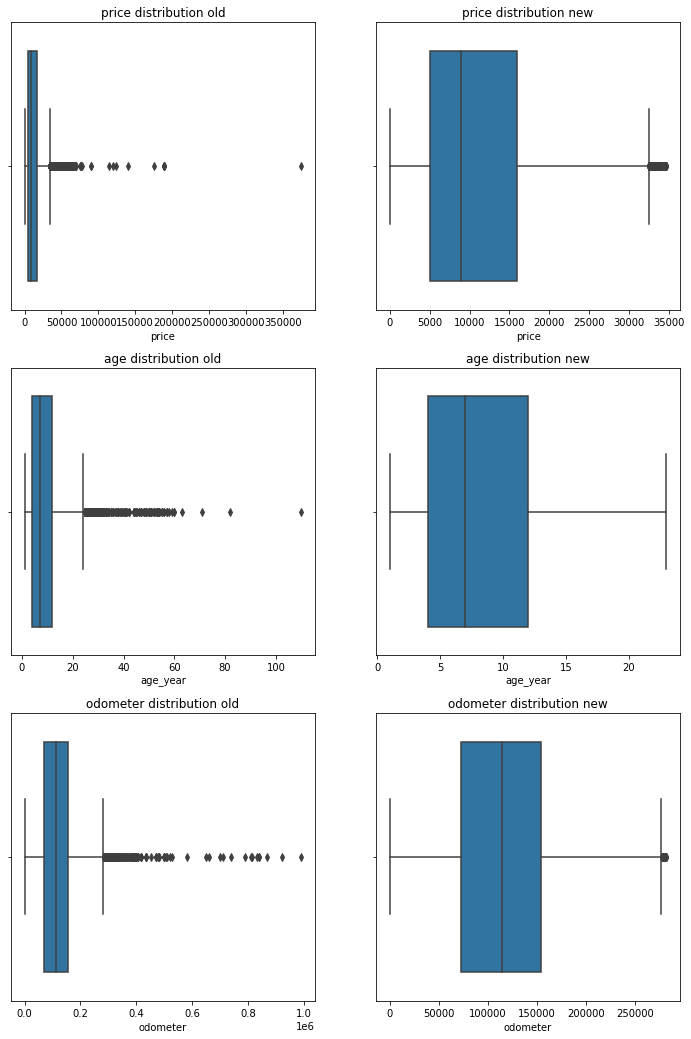

In [172]:
plt.figure(figsize=(12, 18))

plt.subplot(3, 2, 1)
plt.title('price distribution old')
sns.boxplot(df['price'])

plt.subplot(3, 2, 2)
plt.title('price distribution new')
sns.boxplot(df_new['price'])

plt.subplot(3, 2, 3)
plt.title('age distribution old')
sns.boxplot(df['age_year'])

plt.subplot(3, 2, 4)
plt.title('age distribution new')
sns.boxplot(df_new['age_year'])

plt.subplot(3, 2, 5)
plt.title('odometer distribution old')
sns.boxplot(df['odometer'])

plt.subplot(3, 2, 6)
plt.title('odometer distribution new')
sns.boxplot(df_new['odometer'])

plt.show()

Perbedaan antara data lama (kiri) yang masih memiliki outlier dengan data baru (kanan) yang sudah bersih tampak cukup mencolok. 

In [173]:
df.describe()

,price,model_year,condition_rank,cylinders,odometer,days_listed,year_posted,age_year,mileage_per_year
count,36419.000000,36419.000000,36419.000000,36419.000000,36419.000000,36419.000000,36419.000000,36419.000000,36419.000000
mean,12187.675417,2009.753425,2.637003,6.132596,115323.632747,39.649798,2018.306324,8.598424,17998.582847
std,10076.739680,6.265305,0.713758,1.659646,65068.650067,28.119391,0.460972,6.218145,13368.085264
min,1.000000,1908.000000,0.000000,3.000000,0.000000,0.000000,2018.000000,1.000000,0.000000
25%,5000.000000,2006.000000,2.000000,4.000000,69854.000000,19.000000,2018.000000,4.000000,10582.292208
50%,9000.000000,2011.000000,3.000000,6.000000,113000.000000,33.000000,2018.000000,7.000000,15041.500000
75%,16900.000000,2014.000000,3.000000,8.000000,155000.000000,53.000000,2019.000000,12.000000,21607.125000
max,375000.000000,2019.000000,5.000000,12.000000,990000.000000,271.000000,2019.000000,110.000000,373200.000000


In [174]:
df_new.describe()

,price,model_year,condition_rank,cylinders,odometer,days_listed,year_posted,age_year,mileage_per_year
count,34226.000000,34226.000000,34226.000000,34226.000000,34226.000000,34226.000000,34226.000000,34226.000000,34226.000000
mean,11263.696021,2010.061707,2.633086,6.062964,115115.871793,39.630515,2018.305499,8.279291,17926.379908
std,7850.834091,5.129942,0.698664,1.659057,58983.521267,28.123050,0.460625,5.086229,12511.828578
min,1.000000,1995.000000,0.000000,3.000000,0.000000,0.000000,2018.000000,1.000000,0.000000
25%,4999.000000,2007.000000,2.000000,4.000000,73000.000000,19.000000,2018.000000,4.000000,10769.230769
50%,8995.000000,2011.000000,3.000000,6.000000,114227.500000,33.000000,2018.000000,7.000000,15059.560606
75%,15995.000000,2014.000000,3.000000,8.000000,154676.250000,53.000000,2019.000000,12.000000,21450.750000
max,34700.000000,2019.000000,5.000000,12.000000,282493.000000,271.000000,2019.000000,23.000000,195700.000000


Informasi umum antara kedua dataframe juga berubah. Jumlah data berkurang dari 36418 menjadi 34226 baris. Data rata-rata (mean) dan median (50%) pun bergeser menjadi lebih rendah. Nilai minimum (min) tetap sama, tetapi nilai maksimum (max) berkurang signifikan.

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## Masa Berlaku Iklan 

Sekarang kita akan menyelidiki kolom 'days_listed' dari data yang baru untuk mengukur seberapa lama iklan ditayangkan. 

In [175]:
df_new['days_listed'].describe()

count    34226.000000
mean        39.630515
std         28.123050
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

In [176]:
df_new['days_listed'].mode()

0    24
dtype: int64

In [177]:
df_new[df_new['days_listed'] == 24]['days_listed'].count()

655

Secara rata-rata (mean), iklan ditayangkan selama hampir 40 hari sebelum kendaraan laku terjual atau iklan diturunkan, sedangkan mayoritas iklan tayang selama 24 hari (mode), yakni mencapai 655 iklan.

Waktu paling cepat (min) iklan ditayangkan adalah 0 hari, bisa jadi karena segera dihapus atau batal tayang. Sementara itu, waktu terlama (max) mencapai 271 hari atau sekitar 9 bulan. Kita cek persebaran datanya.

(array([1.3723e+04, 1.2278e+04, 5.3360e+03, 2.0180e+03, 5.8300e+02,
        2.0000e+02, 5.5000e+01, 2.1000e+01, 6.0000e+00, 6.0000e+00]),
 array([  0. ,  27.1,  54.2,  81.3, 108.4, 135.5, 162.6, 189.7, 216.8,
        243.9, 271. ]),
 <BarContainer object of 10 artists>)

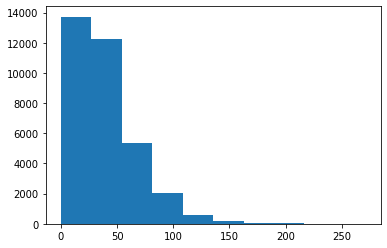

In [178]:
plt.hist(df_new['days_listed'])

<AxesSubplot:xlabel='days_listed'>

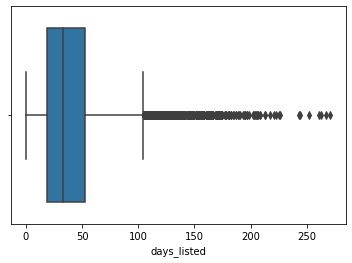

In [179]:
sns.boxplot(df_new['days_listed'])

Mayoritas iklan tayang selama kurang dari 50 hari saja. Terdapat cukup banyak data yang dianggap sebagai outlier di sini. 

Lama atau singkatnya penayangan iklan bisa jadi sangat bergantung pada harga kendaraan, jenis, kondisi, atau usianya. Ini memberi kita gambaran umum tentang kinerja iklan kendaraan sejauh ini.

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## Harga Rata-Rata Setiap Jenis Kendaraan

Selanjutnya, kita akan menghitung jumlah iklan dan rata-rata harga untuk tiap jenis kendaraan. Kita juga menyelidiki hubungan ketergantungan antara jumlah iklan pada jenis kendaraan. Nantinya, kita akan memilih dua jenis kendaraan dengan jumlah iklan paling banyak.

In [180]:
# membuat tabel baru dengan kolom harga rata-rata dan jumlah iklan
mean_price = df_new.pivot_table(index='type', values='price', aggfunc=['mean', 'count'])
mean_price.columns = ['average_price', 'number_of_list']
mean_price.sort_values(by='number_of_list', ascending=False)

,average_price,number_of_list
type,,
sedan,6984.115571,8445
SUV,10531.326681,8418
truck,15057.539104,7902
pickup,15202.944194,4444
coupe,13437.230345,1450
wagon,8886.777568,1061
mini-van,8171.119804,818
hatchback,6685.497878,707
van,9031.925301,415


In [181]:
# menghitung korelasi antara kedua kolom
mean_price['average_price'].corr(mean_price['number_of_list'])

-0.03896121723736776

Jenis kendaraan yang paling banyak diiklankan tidak berbanding lurus dengan harganya. Kendaraan yang rata-rata harganya paling mahal atau paling murah tidak menjadi kendaraan yang paling banyak diiklankan. Korelasi antara keduanya sangat rendah (-0,04).

<AxesSubplot:xlabel='type'>

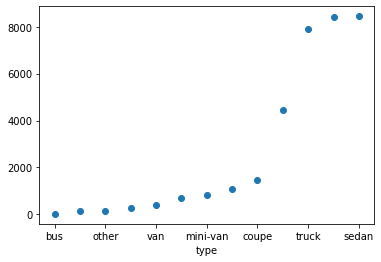

In [182]:
mean_price['number_of_list'].sort_values().plot(style='o')

Berdasarkan grafik ini, terlihat bahwa terjadi lompatan yang signifikan pada jumlah iklan dari tiga tipe teratas dibanding tipe-tipe lainnya. Kita akan fokuskan analisis selanjutnya pada dua jenis dengan jumlah iklan teratas, yakni sedan dan SUV.

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## Faktor Harga

Kini kita akan melakukan analisis untuk mengamati faktor-faktor yang paling mempengaruhi harga kendaraan. Kita akan memfokuskan analisis ini pada dua tipe kendaraan yang paling populer, yakni sedan dan SUV.

Kita akan mengukur sejauh mana korelasi antara harga kendaraan pada kedua tipe ini dengan parameter usia ('age_year'), jarak tempuh ('odometer'), kondisi ('condition_rank'), tipe transmisi ('transmission'), dan warnanya ('paint_color').

Kita akan melakukan analisis untuk jenis sedan, selanjutnya untuk SUV.

### Sedan

In [183]:
# Data frame baru khusus sedan
df_sedan = df_new[df_new['type'] == 'sedan'].reset_index(drop=True)
df_sedan = df_sedan[['price','age_year', 'odometer', 'condition_rank', 'transmission', 'paint_color']]
df_sedan.head()

,price,age_year,odometer,condition_rank,transmission,paint_color
0,5500,6,110000,4,automatic,red
1,14900,2,80903,3,automatic,black
2,14990,4,57954,3,automatic,black
3,12990,3,79212,3,automatic,white
4,8990,7,111142,3,automatic,grey


In [184]:
# Menganalisis korelasi parameter dengan harga
df_sedan.corr()['price']

price             1.000000
age_year         -0.639002
odometer         -0.556728
condition_rank    0.296588
Name: price, dtype: float64

<AxesSubplot:xlabel='age_year', ylabel='price'>

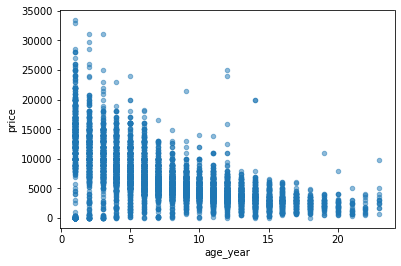

In [185]:
# Korelasi harga dan usia kendaraan
df_sedan.plot(x='age_year', y='price', kind='scatter', alpha=0.5) 

<AxesSubplot:xlabel='odometer', ylabel='price'>

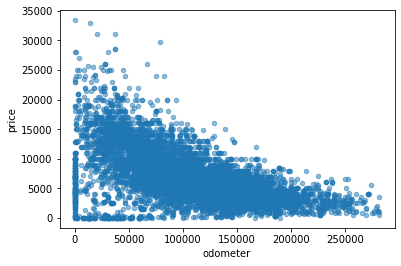

In [186]:
# Korelasi harga dan jarak tempuh kendaraan
df_sedan.plot(x='odometer', y='price', kind='scatter', alpha=0.5) 

<AxesSubplot:xlabel='condition_rank', ylabel='price'>

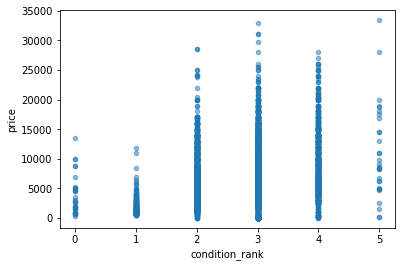

In [187]:
# Korelasi harga dan kondisi kendaraan
df_sedan.plot(x='condition_rank', y='price', kind='scatter', alpha=0.5) 

Berdasarkan analisis korelasi ini, harga kendaraan sedan memiliki korelasi negatif yang cukup kuat dengan usia kendaraan dan jarak tempuh. Makin tinggi usia atau jarak tempuh, makin rendah harganya. 

Sebaliknya, korelasi harga dengan kondisi bersifat positif, tetapi lemah. Peningkatan kualitas kendaraan tidak otomatis menyebabkan harganya turut meningkat. Harga kendaraan terlihat tinggi pada kualitas sedang (2, 3, 4), tetapi relatif rendah pada kualitas tinggi (5).

Selanjutnya, kita periksa korelasi pada variabel kategorik tipe transmisi ('transmission') dan warna ('paint_color').

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

Kita akan periksa dulu jumlah baris iklan pada masing-masing variabel. Kita membutuhkan setidaknya 50 baris iklan untuk masing-masing kategori di kedua variabel ini agar analisis ini menjadi lebih valid.

In [188]:
df_sedan['transmission'].value_counts()

automatic    7930
manual        410
other         105
Name: transmission, dtype: int64

In [189]:
df_sedan['paint_color'].value_counts()

unknown    1514
silver     1426
black      1231
grey       1142
white      1073
blue        859
red         662
custom      197
brown       169
green       136
purple       17
yellow       12
orange        7
Name: paint_color, dtype: int64

Kolom 'transmission' tampaknya cukup memadai, tetapi kolom 'paint_color' memiliki tiga kategori yang tidak memenuhi syarat, yakni purple, yellow, dan 'orange'. Kita akan kecualikan ketiga kelompok tersebut.

<AxesSubplot:xlabel='price', ylabel='transmission'>

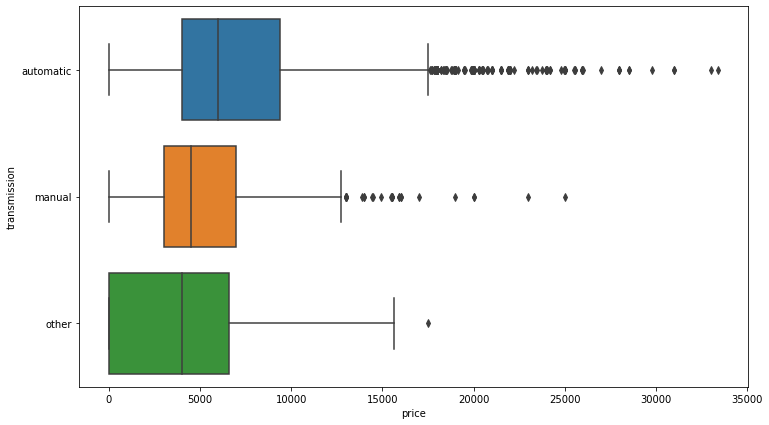

In [190]:
# Korelasi harga dengan variabel transmisi
plt.figure(figsize=(12,7))
sns.boxplot(data=df_sedan, x='price', y='transmission')


Terlihat bahwa kendaraan dengan transmisi otomatis cenderung memiliki harga lebih tinggi dibanding transmisi manual dan jenis transmisi lainnya.

<AxesSubplot:xlabel='price', ylabel='paint_color'>

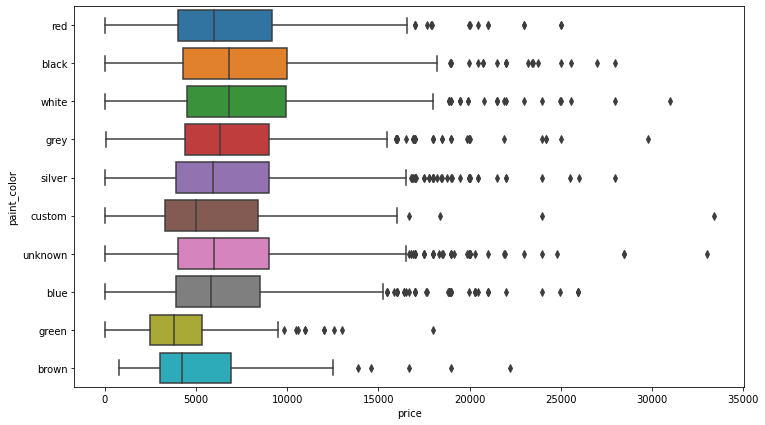

In [191]:
# Korelasi harga dengan variabel warna
sedan_color = df_sedan[~df_sedan['paint_color'].isin(['purple', 'yellow', 'orange'])]
plt.figure(figsize=(12,7))
sns.boxplot(data=sedan_color, x='price', y='paint_color')

Korelasi harga dengan warna kendaraan relatif rendah. Tidak banyak perbedaan harga antara warna yang satu dengan yang lain.

Mari lanjutkan pada jenis kendaraan berikutnya, yakni SUV. Kita akan mengulang proses yang sama.

<div class="alert alert-danger">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

- masih ada jumlah iklan yang dibawah 50 yaitu purple, yellow dan orange
    - harus di take out ya 3 kategori itu

</div>

<div class="alert alert-success">
<b>Adipta's comment v.2</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### SUV

In [192]:
# Data frame baru khusus SUV
df_suv = df_new[df_new['type'] == 'SUV'].reset_index(drop=True)
df_suv = df_new[['price','age_year', 'odometer', 'condition_rank', 'transmission', 'paint_color']]
df_suv.head()

,price,age_year,odometer,condition_rank,transmission,paint_color
0,9400,7,145000,2,automatic,unknown
1,5500,6,110000,4,automatic,red
2,14900,2,80903,3,automatic,black
3,14990,4,57954,3,automatic,black
4,12990,3,79212,3,automatic,white


<div class="alert alert-danger">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

- itu kenapa ada df_sedan ya di baris ke 2

</div>

<div class="alert alert-success">
<b>Adipta's comment v.2</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

In [193]:
# Mengukur korelasi sejumlah paramter dengan harga
df_suv.corr()['price']

price             1.000000
age_year         -0.533737
odometer         -0.435377
condition_rank    0.186926
Name: price, dtype: float64

<AxesSubplot:xlabel='age_year', ylabel='price'>

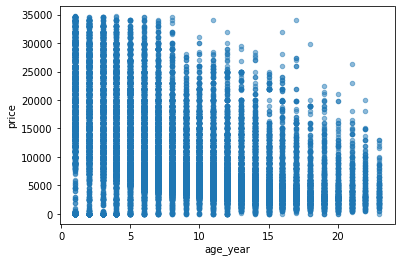

In [194]:
# Korelasi harga dan usia kendaraan
df_suv.plot(x='age_year', y='price', kind='scatter', alpha=0.5) 

<AxesSubplot:xlabel='odometer', ylabel='price'>

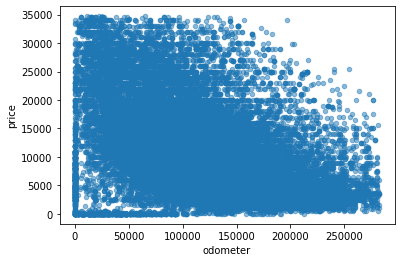

In [195]:
# Korelasi harga dan jarak tempuh kendaraan
df_suv.plot(x='odometer', y='price', kind='scatter', alpha=0.5) 

<AxesSubplot:xlabel='condition_rank', ylabel='price'>

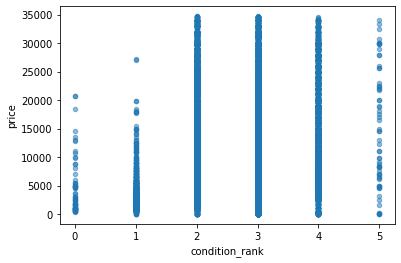

In [196]:
# Korelasi harga dan kondisi kendaraan
df_suv.plot(x='condition_rank', y='price', kind='scatter', alpha=0.5) 

Pola korelasi pada mobil tipe SUV ini relatif sama dengan tipe sedan yang sebelumnya telah kita analisis. Namun, tingkat korelasinya terlihat lebih rendah dibanding tipe sedan. Kolom 'age_year' memiliki korelasi -0.533737, kolom 'odometer' hanya -0.435377, dan kolom 'condition_rank' hanya 0.186926.

Di kolom 'condition_rank', polanya juga relatif mirip, yakni kendaraan dengan kualitas menengah justru cenderung lebih tinggi harganya.

Kita akan periksa, apakah hal yang sama juga berlaku untuk korelasi pada variabel kategorik tipe transmisi ('transmission') dan warna ('paint_color'). Kita akan periksa dulu kelayakan variabelnya (lebih dari 50 baris iklan atau tidak).

In [197]:
df_suv['transmission'].value_counts()

automatic    31250
manual        1732
other         1244
Name: transmission, dtype: int64

In [198]:
df_suv['paint_color'].value_counts()

white      6576
unknown    6110
black      5105
silver     4272
grey       3412
blue       2977
red        2937
green       887
brown       788
custom      788
yellow      162
orange      148
purple       64
Name: paint_color, dtype: int64

Tampaknya tidak ada masalah, semua kategori memiliki data di atas 50 baris. Kita akan lanjutkan analisisnya.

<AxesSubplot:xlabel='price', ylabel='transmission'>

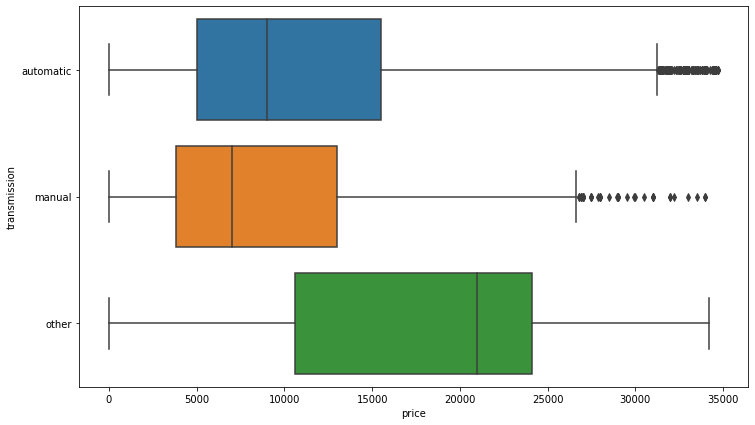

In [199]:
# Korelasi harga dengan variabel transmisi
plt.figure(figsize=(12,7))
sns.boxplot(data=df_suv, x='price', y='transmission')

<AxesSubplot:xlabel='price', ylabel='paint_color'>

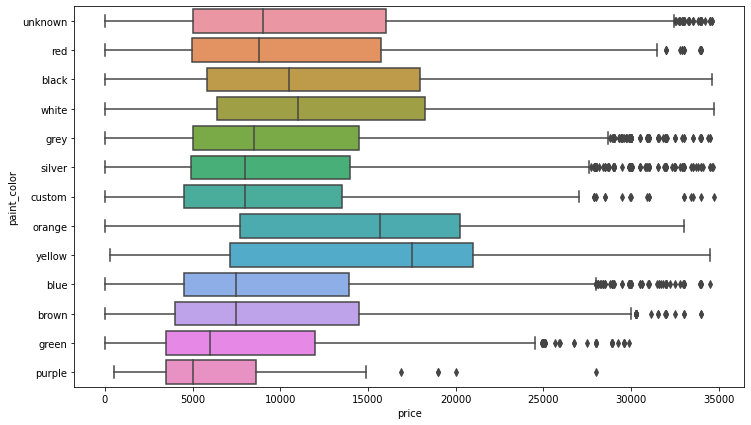

In [200]:
# Korelasi harga dengan variabel warna
plt.figure(figsize=(12,7))
sns.boxplot(data=df_suv, x='price', y='paint_color')

Tampaknya, di tipe SUV ini, variable kategorik memiliki pengaruh yang cukup besar terhadap faktor harga. Kendaraan dengan tipe transmisi 'other' memiliki median tingkat harga yang jauh lebih tinggi dibanding tipe transmisi automatic dan manual. Sementara itu, untuk kategori warna, orange dan yellow memiliki tingkat harga yang secara umum lebih tinggi dibanding warna lainnya.  

<div class="alert alert-danger">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

- cek juga ya setiap kategorinya harus diatas 50 sesuai dengan instruksi

</div>

<div class="alert alert-success">
<b>Adipta's comment v.2</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## Kesimpulan Umum

Kita telah selesai melakukan analisis data eksploratif untuk mengukur faktor-faktor yang menentukan harga suatu kendaraan dengan bermodalkan data yang kita peroleh dari pengiklanan di Crankshaft List. 

Selama proses ini, kita telah membersihkan data dengan mengisi sebagian nilai yang hilang dan memangkas yang lainnya. Hal ini dilakukan agar data yang ada dapat benar-benar representatif. Pada akhirnya, analisis kita mengerucut pada dua tipe kendaraan yang paling banyak diiklankan di Crankshaft List, yakni sedan dan SUV. 

Analisis ini berhasil menemukan bahwa harga suatu kendaraan yang diiklankan di Crankshaft List memiliki korelasi yang cukup kuat dengan usia kendaraan dan jarak tempuh, serta korelasi yang relatif lemah dengan kondisi kendaraan. Namun, secara umum tingkat korelasinya lebih kuat pada model sedan ketimbang model SUV.

Sementara itu, untuk variable kategorik berupa transmisi dan warna, ada perbedaan pola di antara sedan dan SUV. 

Pada kategori transmisi, tipe sedan cenderung lebih mahal pada jenis transmisi otomatis dan paling murah pada transmisi 'other'. Sebaliknya, pada tipe SUV, transmisi 'other' justru menjadi yang paling mahal.

Perbedaan juga terlihat pada kategori warna. Secara umum, pada tipe sedan, warna kendaraan tidak begitu mempengaruhi harga, tetapi pada tipe SUV terdapat jenis warna yang memiliki harga jauh lebih tinggi ketimbang yang lain.

Dari analisis ini, kita dapat cukup yakin untuk mengatakan bahwa faktor usia kendaraan dan jarak tempuh menjadi faktor yang paling berpengaruh pada harga kendaraan yang diiklankan di Crankshaft List. Sementara itu, faktor lainnya seperti kondisi kendaraan, jenis transmisi, dan warna kendaraan relatif rendah pengaruhnya.

<div class="alert alert-block alert-warning">

# General comments #1
<b>Reviewer's comment</b> <a class="tocSkip"></a> 

Good Job Dony! Sebagian besar kamu telah menyelesaikan project ini dengan baik namun masih ada beberapa hal yang bisa diimprove yang saya tandai dengan comment berwarna kuning dan merah. Jika kamu telah merevisinya, projectmu akan di approve dan kamu bisa lanjut ke tahapan selanjutnya!.
    
Keep going Dony, you are doing very well!
    

</div>


<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    
Terima kasih banyak mas. Semoga yang ini sudah benar.

</div>

<div class="alert alert-block alert-success">

# General comments #1
<b>Reviewer's comment</b> <a class="tocSkip"></a> 

Good Job Dony! Sudah sesuai ya revisinya!
    

</div>